In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from matplotlib.ticker import FuncFormatter

In [155]:
# this allows me to see more rows so I can copy and paste df data
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 

In [25]:
pop_df = pd.read_csv(r'C:\DA12\Projects\capstone_refugees_da12\data\population_totals.csv', skiprows=14)

In [27]:
pop_df.iloc[0:20]

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
0,1951,Unknown,UNK,Australia,AUS,180000,0,0,-,0,0,0
1,1951,Unknown,UNK,Austria,AUT,282000,0,0,-,0,0,0
2,1951,Unknown,UNK,Belgium,BEL,55000,0,0,-,0,0,0
3,1951,Unknown,UNK,Canada,CAN,168511,0,0,-,0,0,0
4,1951,Unknown,UNK,Denmark,DNK,2000,0,0,-,0,0,0
5,1951,Unknown,UNK,France,FRA,290000,0,0,-,0,0,0
6,1951,Unknown,UNK,United Kingdom of Great Britain and Northern I...,GBR,208000,0,0,-,0,0,0
7,1951,Unknown,UNK,Germany,DEU,265000,0,0,-,0,0,0
8,1951,Unknown,UNK,Greece,GRC,18000,0,0,-,0,0,0
9,1951,Unknown,UNK,"China, Hong Kong SAR",HKG,30000,0,0,-,0,0,0


In [6]:
pop_df[pop_df['Country of origin'] == 'Israel'] 

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
3838,1988,Israel,ISR,United Kingdom of Great Britain and Northern I...,GBR,5,0,0,-,0,0,0
4244,1989,Israel,ISR,United Kingdom of Great Britain and Northern I...,GBR,5,0,0,-,0,0,0
4604,1990,Israel,ISR,Denmark,DNK,9,0,0,-,0,0,0
4974,1990,Israel,ISR,United States of America,USA,5,0,0,-,0,0,0
5111,1991,Israel,ISR,Denmark,DNK,9,0,0,-,0,0,0
5461,1991,Israel,ISR,Sweden,SWE,14,0,0,-,0,0,0
5549,1991,Israel,ISR,United States of America,USA,5,0,0,-,0,0,0
5702,1992,Israel,ISR,Denmark,DNK,9,0,0,-,0,0,0
6134,1992,Israel,ISR,Sweden,SWE,19,0,0,-,0,0,0
6235,1992,Israel,ISR,United States of America,USA,9,0,0,-,0,0,0


In [7]:
#pop_df.info()

In [8]:
# total refugees by country of origin for all years. This is what I copied over to Tableau 
count_origin = (
    pop_df.groupby('Country of origin')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:500] 
)
count_origin

,Country of origin,Refugees under UNHCR's mandate
0,Afghanistan,154402630
204,Unknown,94345652
185,Syrian Arab Rep.,63787855
91,Iraq,28897656
175,Somalia,25065193
65,Ethiopia,24508457
181,Sudan,22451952
177,South Sudan,19132212
4,Angola,17775243
53,Dem. Rep. of the Congo,16858541


In [9]:
# same thing but for countries of asylum. This is what I copied over to Tableau 
count_asylum = (
    pop_df.groupby('Country of asylum')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:500]
)
count_asylum

,Country of asylum,Refugees under UNHCR's mandate
131,Pakistan,82006466
83,Iran (Islamic Rep. of),78675611
69,Germany,40463645
183,United States of America,34396886
177,Türkiye,33193266
164,Sudan,26494742
50,Dem. Rep. of the Congo,26341554
178,Uganda,20380064
182,United Rep. of Tanzania,17063734
61,Ethiopia,17061232


In [10]:
# same thing but only for top 10 countries of origin
count_origin_top = (
    pop_df.groupby('Country of origin')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:10] 
)
count_origin_top

,Country of origin,Refugees under UNHCR's mandate
0,Afghanistan,154402630
204,Unknown,94345652
185,Syrian Arab Rep.,63787855
91,Iraq,28897656
175,Somalia,25065193
65,Ethiopia,24508457
181,Sudan,22451952
177,South Sudan,19132212
4,Angola,17775243
53,Dem. Rep. of the Congo,16858541


In [11]:
# same thing but only for top 10 countries of asylum
count_asylum_top = (
    pop_df.groupby('Country of asylum')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:10]
)
count_asylum_top

,Country of asylum,Refugees under UNHCR's mandate
131,Pakistan,82006466
83,Iran (Islamic Rep. of),78675611
69,Germany,40463645
183,United States of America,34396886
177,Türkiye,33193266
164,Sudan,26494742
50,Dem. Rep. of the Congo,26341554
178,Uganda,20380064
182,United Rep. of Tanzania,17063734
61,Ethiopia,17061232


In [12]:
# slicing pop_df to only include countries that exist in count_origin_top df
top_df_origin = pop_df[pop_df['Country of origin'].isin(count_origin_top['Country of origin'])]

# Group by year and country to get sum of refugees by country by year
df_grouped_origin = top_df_origin.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
#df_grouped

# Create pivot table with country as rows and year as columns
df_pivot_origin = df_grouped_origin.pivot(index='Year', columns='Country of origin', values='Refugees under UNHCR\'s mandate')
#df_pivot

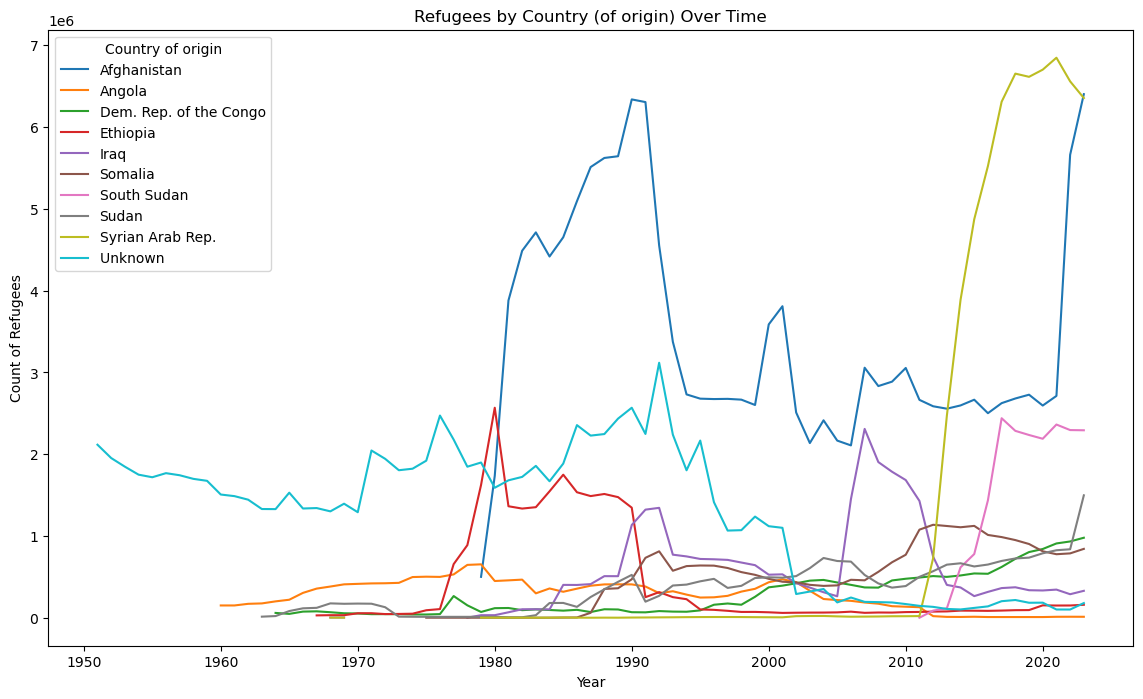

In [13]:
# Now plot this data
plt.figure(figsize=(14, 8))
df_pivot_origin.plot(kind='line', legend=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country (of origin) Over Time')
plt.show()

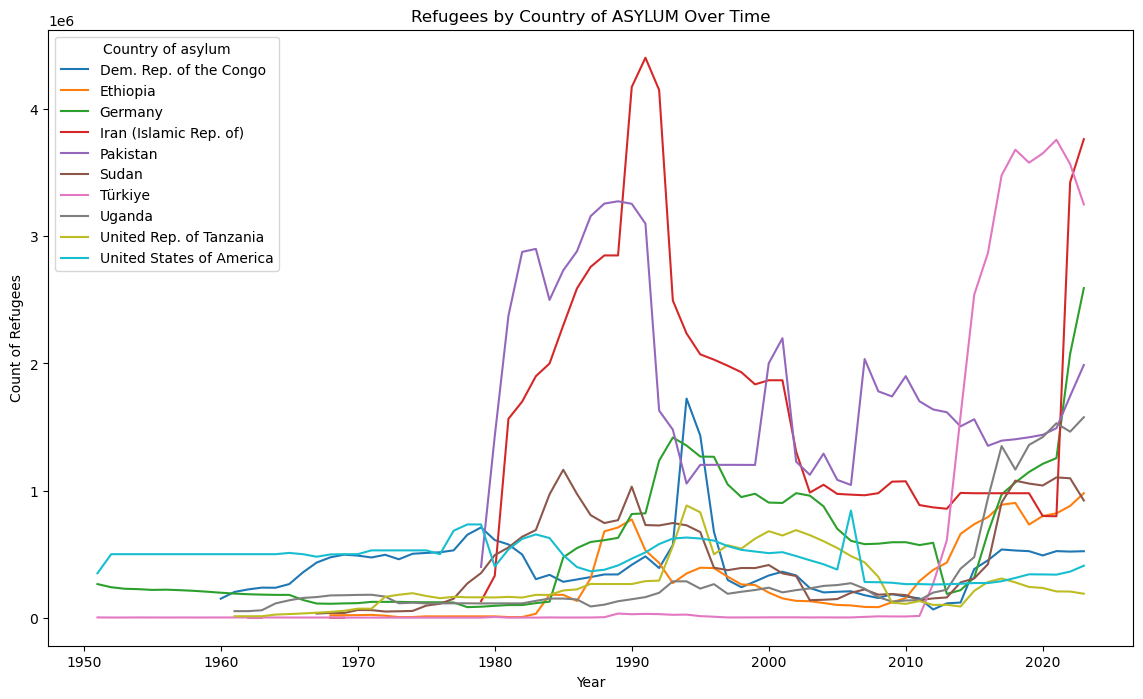

In [14]:
# do the same graph as above but for country of ASYLUM

# slicing pop_df to only include countries that exist in count_asylum_top df
top_df_asylum = pop_df[pop_df['Country of asylum'].isin(count_asylum_top['Country of asylum'])]

# Group by year and country to get sum of refugees by country by year
df_grouped_asylum = top_df_asylum.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

# Create pivot table with country as rows and year as columns
df_pivot_asylum = df_grouped_asylum.pivot(index='Year', columns='Country of asylum', values='Refugees under UNHCR\'s mandate')

plt.figure(figsize=(14, 8))
df_pivot_asylum.plot(kind='line', legend=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country of ASYLUM Over Time')
plt.show()

In [15]:
# ORIGIN graph but with ALL countries grey w/ selected ones highlighted 

# to create df with ALL countries
df_grouped_origin_all = pop_df.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
df_pivot_origin_all = df_grouped_origin_all.pivot(index='Year', columns='Country of origin', values='Refugees under UNHCR\'s mandate')

# remove "unknown" from origin column
df_pivot_origin_all = df_pivot_origin_all.drop(columns=[col for col in df_pivot_origin_all.columns if 'unknown' in col.lower()])


In [159]:
# df_pivot_origin_all
# this is what I copied over to excel

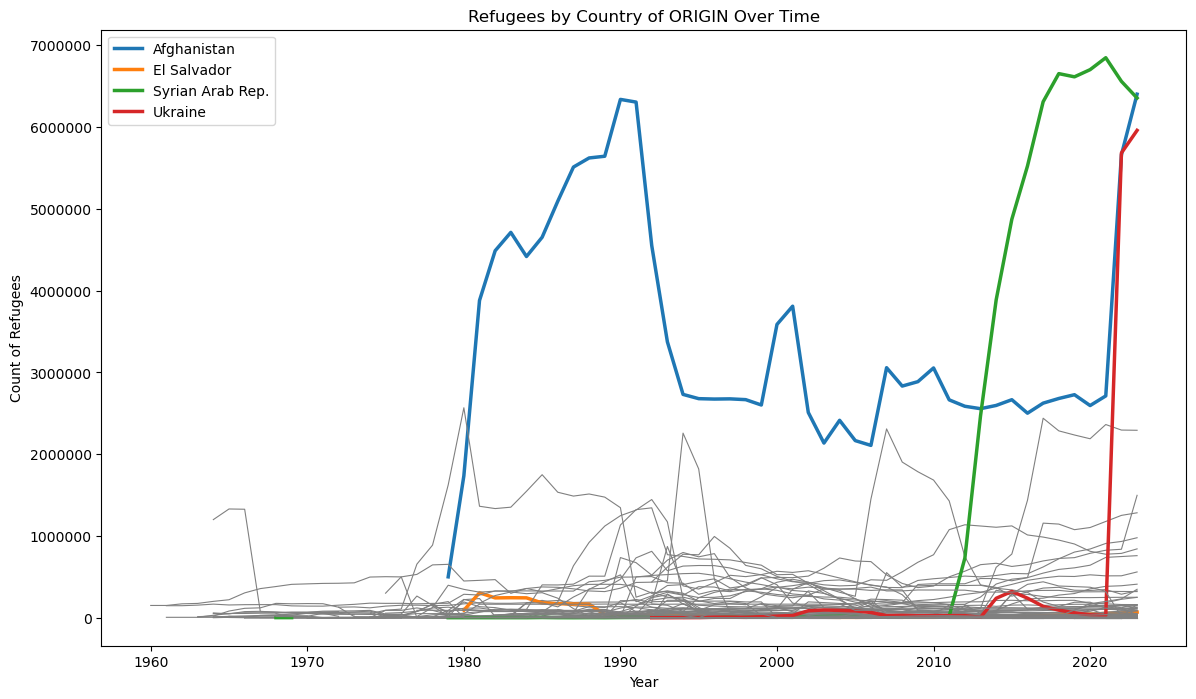

In [16]:
highlight_countries_origin = ['Afghanistan', 'Syrian Arab Rep.', 'Ukraine', 'El Salvador']

# Step 1: Define a color for each country (grey for others)
colors_origin = ['grey' if country not in highlight_countries_origin else None for country in df_pivot_origin_all.columns]

# Step 2: Plot the data
plt.figure(figsize=(14, 8))

# Plot each country line with appropriate color
for country in df_pivot_origin_all:
    if country in highlight_countries_origin:
        df_pivot_origin_all[country].plot(kind='line', ax=plt.gca(), label=country, legend=True, linewidth=2.5)  # Default color for highlighted countries
    else:
        df_pivot_origin_all[country].plot(kind='line', ax=plt.gca(), color='grey', label='_nolegend_', linewidth=0.8)  # Grey for other countries

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country of ORIGIN Over Time')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [17]:
# Next do the same graph by with country of ASYLUM. Then edit legend to show only certain countries on each graph. 
# Ultimately display these next to each other when I explain why I chose the countries I did

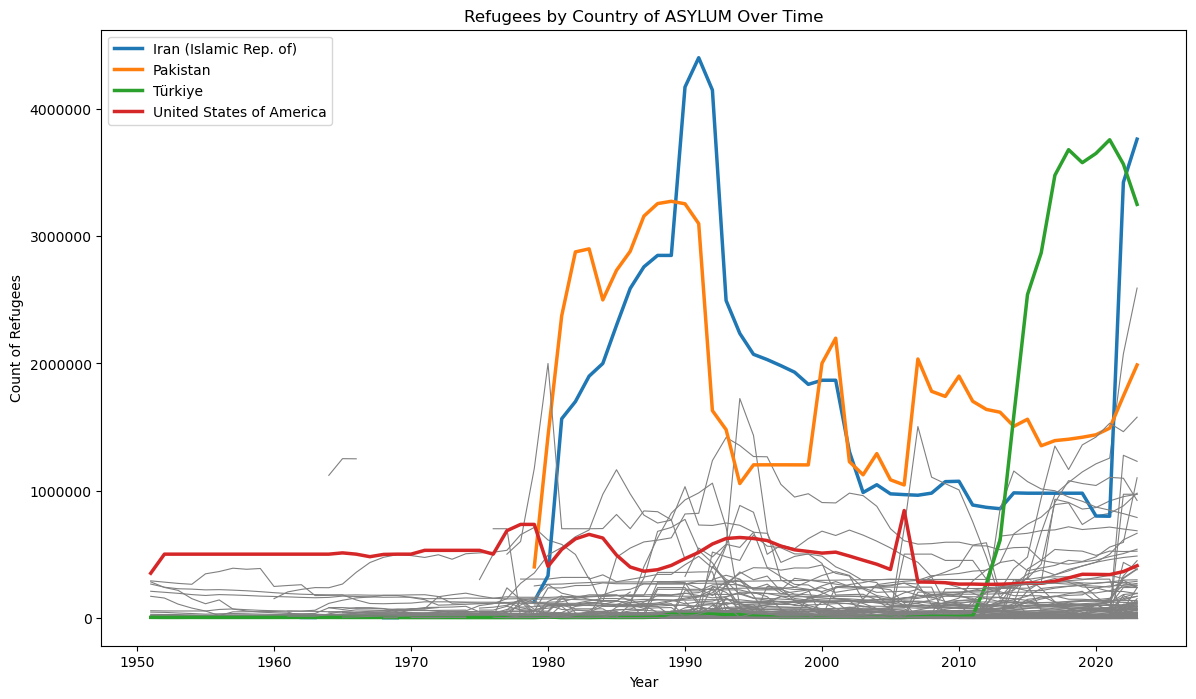

In [18]:
# now the same but for ASYLUM
# to create df with ALL countries
df_grouped_asylum_all = pop_df.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
df_pivot_asylum_all = df_grouped_asylum_all.pivot(index='Year', columns='Country of asylum', values='Refugees under UNHCR\'s mandate')

# remove "unknown" from asylum column
df_pivot_asylum_all = df_pivot_asylum_all.drop(columns=[col for col in df_pivot_asylum_all.columns if 'unknown' in col.lower()])

# graph 
highlight_countries_asylum = ['United States of America', 'Iran (Islamic Rep. of)', 'Pakistan', 'Türkiye']

# Step 1: Define a color for each country (grey for others)
colors_asylum = ['grey' if country not in highlight_countries_asylum else None for country in df_pivot_asylum_all.columns]

# Step 2: Plot the data
plt.figure(figsize=(14, 8))

# Plot each country line with appropriate color
for country in df_pivot_asylum_all:
    if country in highlight_countries_asylum:
        df_pivot_asylum_all[country].plot(kind='line', ax=plt.gca(), label=country, legend=True, linewidth=2.5)  # Default color for highlighted countries
    else:
        df_pivot_asylum_all[country].plot(kind='line', ax=plt.gca(), color='grey', label='_nolegend_', linewidth=0.8)  # Grey for other countries

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country of ASYLUM Over Time')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [17]:
#df_pivot_asylum_all

In [19]:
# Afghanistan

In [15]:
# pulling out only data where country of origin was afghanistan
afghanistan = pop_df[pop_df['Country of origin'] == 'Afghanistan']
#afghanistan

# grouping by year, country of asylum 
afghanistan_grouped = afghanistan.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
afghanistan_grouped 

# converting pivot table so it can be displayed on line graph 
afghanistan_pivot = afghanistan_grouped.pivot(index='Year', columns='Country of asylum', values='Refugees under UNHCR\'s mandate')
#afghanistan_pivot

NameError: name 'pop_df' is not defined

In [21]:
# line chart by country to see who responded to Afghanistan's needs. NOT WHAT I WANT 
'''
highlight_countries_afghanistan = ['United States of America', 'Iran (Islamic Rep. of)', 'Pakistan']

plt.figure(figsize=(14, 8))

# plot countries of asylum
for country in afghanistan_pivot:
    if country in highlight_countries_afghanistan:
        afghanistan_pivot[country].plot(kind='line', ax=plt.gca(), label=country, legend=True, linewidth=2)  # Default color for highlighted countries
    else:
        afghanistan_pivot[country].plot(kind='line', ax=plt.gca(), color='grey', label='_nolegend_', linewidth=0.8)  # Grey for other countries

# plot afghanistan
highlight_countries_origin_afghanistan = ['Afghanistan']
for country in df_pivot_origin_all:
    if country in highlight_countries_origin_afghanistan:
        df_pivot_origin_all[country].plot(kind='line', ax=plt.gca(), label=country, legend=True, linewidth=4)  # Default color for highlighted countries

plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Afghan Refugees\' Country of ASYLUM')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()
'''

"\nhighlight_countries_afghanistan = ['United States of America', 'Iran (Islamic Rep. of)', 'Pakistan']\n\nplt.figure(figsize=(14, 8))\n\n# plot countries of asylum\nfor country in afghanistan_pivot:\n    if country in highlight_countries_afghanistan:\n        afghanistan_pivot[country].plot(kind='line', ax=plt.gca(), label=country, legend=True, linewidth=2)  # Default color for highlighted countries\n    else:\n        afghanistan_pivot[country].plot(kind='line', ax=plt.gca(), color='grey', label='_nolegend_', linewidth=0.8)  # Grey for other countries\n\n# plot afghanistan\nhighlight_countries_origin_afghanistan = ['Afghanistan']\nfor country in df_pivot_origin_all:\n    if country in highlight_countries_origin_afghanistan:\n        df_pivot_origin_all[country].plot(kind='line', ax=plt.gca(), label=country, legend=True, linewidth=4)  # Default color for highlighted countries\n\nplt.xlabel('Year')\nplt.ylabel('Count of Refugees')\nplt.title('Afghan Refugees' Country of ASYLUM')\nplt.t

In [22]:
# Ukraine

# pulling out only data where country of origin was Ukraine
ukraine = pop_df[pop_df['Country of origin'] == 'Ukraine']
#afghanistan

# grouping by year, country of asylum 
ukraine_grouped = ukraine.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

# converting pivot table so it can be displayed on line graph 
ukraine_pivot = ukraine_grouped.pivot(index='Year', columns='Country of asylum', values='Refugees under UNHCR\'s mandate')

In [23]:
# Change of plans. Do a stacked line chart instead of line for country of asylum

In [24]:
# let's try again... with AFGHANISTAN 
total_volumes = afghanistan_pivot.sum().sort_values(ascending=False).reset_index()
total_volumes

,Country of asylum,0
0,Pakistan,81949018.0
1,Iran (Islamic Rep. of),66434163.0
2,Germany,1605407.0
3,India,440950.0
4,United Kingdom of Great Britain and Northern I...,404394.0
5,Austria,387799.0
6,Netherlands (Kingdom of the),368262.0
7,France,324963.0
8,Sweden,304347.0
9,United States of America,211627.0


In [25]:
afghanistan_2 = pop_df[pop_df['Country of origin'] == 'Afghanistan']
#afghanistan

# grouping by year, country of asylum 
afghanistan_grouped_2 = afghanistan_2.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
#afghanistan_grouped 

# adding a column and changing counries to 'other' other than what I call out...
country_of_asylum = []
for country in afghanistan_grouped_2['Country of asylum']:
    if country == 'Pakistan':
        country_of_asylum.append('Pakistan')
    elif country == 'Iran (Islamic Rep. of)':
        country_of_asylum.append('Iran (Islamic Rep. of)')
    else:
        country_of_asylum.append('other')
afghanistan_grouped_2['country_of_asylum'] = country_of_asylum
afghanistan_grouped_2


,Year,Country of asylum,Refugees under UNHCR's mandate,country_of_asylum
0,1979,Iran (Islamic Rep. of),100000,Iran (Islamic Rep. of)
1,1979,Pakistan,400000,Pakistan
2,1980,Iran (Islamic Rep. of),300000,Iran (Islamic Rep. of)
3,1980,Italy,191,other
4,1980,Pakistan,1428230,Pakistan
...,...,...,...,...
2337,2023,United States of America,32348,other
2338,2023,Uruguay,6,other
2339,2023,Uzbekistan,9405,other
2340,2023,Venezuela (Bolivarian Republic of),10,other


In [26]:
# I guess I have to delete the original column??
del afghanistan_grouped_2['Country of asylum']

In [27]:
afghanistan_grouped_2

,Year,Refugees under UNHCR's mandate,country_of_asylum
0,1979,100000,Iran (Islamic Rep. of)
1,1979,400000,Pakistan
2,1980,300000,Iran (Islamic Rep. of)
3,1980,191,other
4,1980,1428230,Pakistan
...,...,...,...
2337,2023,32348,other
2338,2023,6,other
2339,2023,9405,other
2340,2023,10,other


In [28]:
# rearrange columns? this didn't change anything 
#afghanistan_grouped_2 = afghanistan_grouped_2[['Year', 'country_of_asylum', 'Refugees under UNHCR\'s mandate']]
#afghanistan_grouped_2

In [29]:
# converting pivot table so it can be displayed on line graph. 

# first I have to group by year and country
afghanistan_grouped_2 = afghanistan_grouped_2.groupby(['Year', 'country_of_asylum']).agg({
    'Refugees under UNHCR\'s mandate': 'sum'  # Sum or choose another aggregation method
}).reset_index()

# now I can pivot 
afghanistan_pivot_2 = afghanistan_grouped_2.pivot(index='Year', columns='country_of_asylum', values='Refugees under UNHCR\'s mandate')
afghanistan_pivot_2.head()

country_of_asylum,Iran (Islamic Rep. of),Pakistan,other
Year,,,
1979,100000.0,400000.0,NaN
1980,300000.0,1428230.0,6691.0
1981,1500000.0,2375330.0,4654.0
1982,1600000.0,2877480.0,10734.0
1983,1800000.0,2900000.0,12735.0


In [151]:
# this is what I copied over to Excel 
afghanistan_pivot_2

country_of_asylum,Iran (Islamic Rep. of),Pakistan,other
Year,,,
1979,100000.0,400000.0,NaN
1980,300000.0,1428230.0,6691.0
1981,1500000.0,2375330.0,4654.0
1982,1600000.0,2877480.0,10734.0
1983,1800000.0,2900000.0,12735.0
1984,1900000.0,2500000.0,17651.0
1985,1900000.0,2729910.0,23283.0
1986,2190000.0,2878100.0,26183.0
1987,2350000.0,3156000.0,5740.0


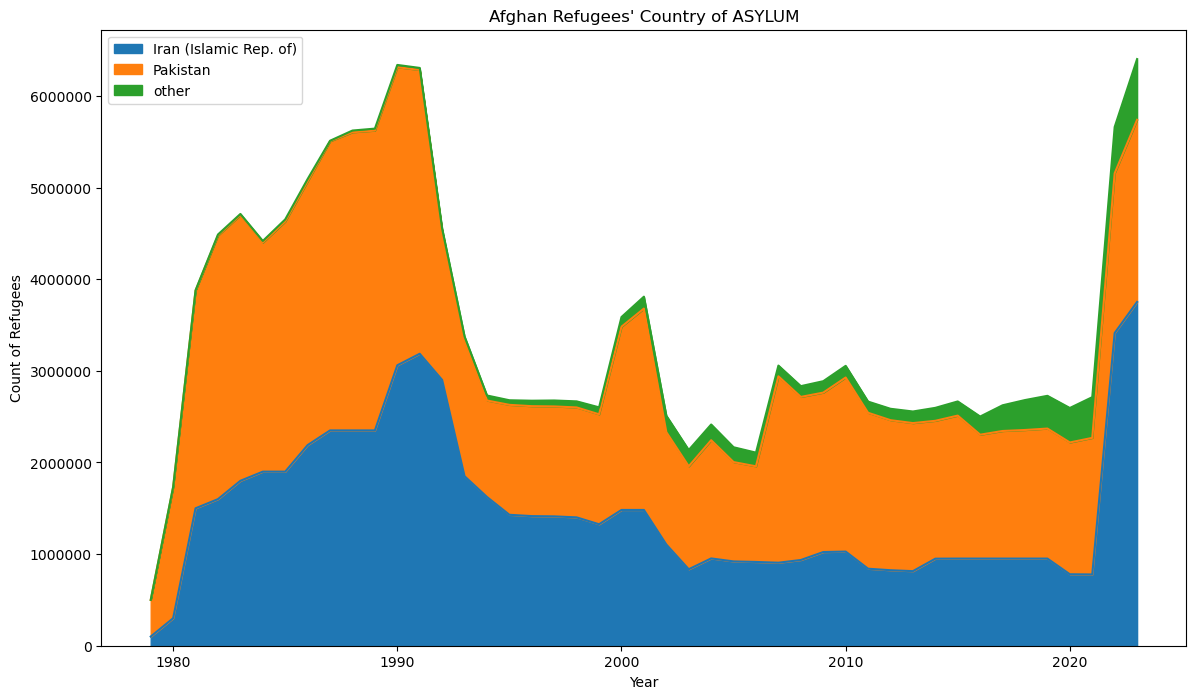

In [149]:
# now finally I can freakin graph
plt.figure(figsize=(14, 8))
afghanistan_pivot_2.plot(kind='area', stacked=True, ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Afghan Refugees\' Country of ASYLUM')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [31]:
# DO A GRAPH TO SHOW PERCENT OF PAKISTAN'S REFUGEES WERE FROM AFGHANISTAN

In [32]:
# EL SALVADOR 

In [33]:
# pulling out only data where country of origin was el salvador
salvador = pop_df[pop_df['Country of origin'] == 'El Salvador']

In [34]:
# which countries do I want to highlight?
salvador \
    .groupby(['Country of asylum'])['Refugees under UNHCR\'s mandate'].sum() \
    .reset_index() \
    .sort_values('Refugees under UNHCR\'s mandate', ascending=False) \
    .head()

,Country of asylum,Refugees under UNHCR's mandate
24,Mexico,1146041
17,Guatemala,373734
36,United States of America,280850
18,Honduras,210738
27,Nicaragua,161877


In [35]:
# grouping by year, country of asylum 
salvador_grouped = salvador.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
salvador_grouped 

,Year,Country of asylum,Refugees under UNHCR's mandate
0,1980,Belize,4000
1,1980,Costa Rica,7500
2,1980,Guatemala,4130
3,1980,Honduras,25000
4,1980,Mexico,44000
...,...,...,...
803,2023,Sweden,125
804,2023,Switzerland,16
805,2023,United Kingdom of Great Britain and Northern I...,3610
806,2023,United States of America,35083


In [36]:
# call out highlighted countries. Mark all others as 'other'
country_of_asylum = []
for country in salvador_grouped['Country of asylum']:
    if country == 'Mexico':
        country_of_asylum.append('Mexico')
    elif country == 'Guatemala':
        country_of_asylum.append('Guatemala')
    elif country == 'United States of America':
        country_of_asylum.append('United States of America')
    elif country == 'Honduras':
        country_of_asylum.append('Honduras')
    elif country == 'Nicaragua':
        country_of_asylum.append('Nicaragua')
    else:
        country_of_asylum.append('other')
salvador_grouped['country_of_asylum'] = country_of_asylum
salvador_grouped

,Year,Country of asylum,Refugees under UNHCR's mandate,country_of_asylum
0,1980,Belize,4000,other
1,1980,Costa Rica,7500,other
2,1980,Guatemala,4130,Guatemala
3,1980,Honduras,25000,Honduras
4,1980,Mexico,44000,Mexico
...,...,...,...,...
803,2023,Sweden,125,other
804,2023,Switzerland,16,other
805,2023,United Kingdom of Great Britain and Northern I...,3610,other
806,2023,United States of America,35083,United States of America


In [37]:
# group again by year / country with new column country_of_asylum
salvador_grouped_2 = salvador_grouped.groupby(['Year', 'country_of_asylum']).agg({
    'Refugees under UNHCR\'s mandate': 'sum'  # Sum or choose another aggregation method
}).reset_index()
salvador_grouped_2

,Year,country_of_asylum,Refugees under UNHCR's mandate
0,1980,Guatemala,4130
1,1980,Honduras,25000
2,1980,Mexico,44000
3,1980,Nicaragua,4000
4,1980,other,14500
5,1981,Guatemala,100000
6,1981,Honduras,26000
7,1981,Mexico,140000
8,1981,Nicaragua,20810
9,1981,other,18000


In [38]:
# now I can pivot 
salvador_pivot = salvador_grouped_2.pivot(index='Year', columns='country_of_asylum', values='Refugees under UNHCR\'s mandate')
salvador_pivot.head()

country_of_asylum,Guatemala,Honduras,Mexico,Nicaragua,United States of America,other
Year,,,,,,
1980,4130.0,25000.0,44000.0,4000.0,NaN,14500.0
1981,100000.0,26000.0,140000.0,20810.0,NaN,18000.0
1982,70000.0,15840.0,120000.0,22740.0,NaN,13820.0
1983,70000.0,19100.0,120000.0,17500.0,NaN,18000.0
1984,70000.0,21400.0,120000.0,17500.0,NaN,14100.0


In [141]:
#chat gpt... to try to sort by volumn 
total_refugees_by_country_salvador = salvador_pivot.sum(axis=0)

# Step 2: Sort the columns of the DataFrame by the total refugee count (from most to least)
salvador_pivot_sorted = salvador_pivot[total_refugees_by_country_salvador.sort_values(ascending=False).index]

In [7]:
# copied this over to Excel
#salvador_pivot_sorted

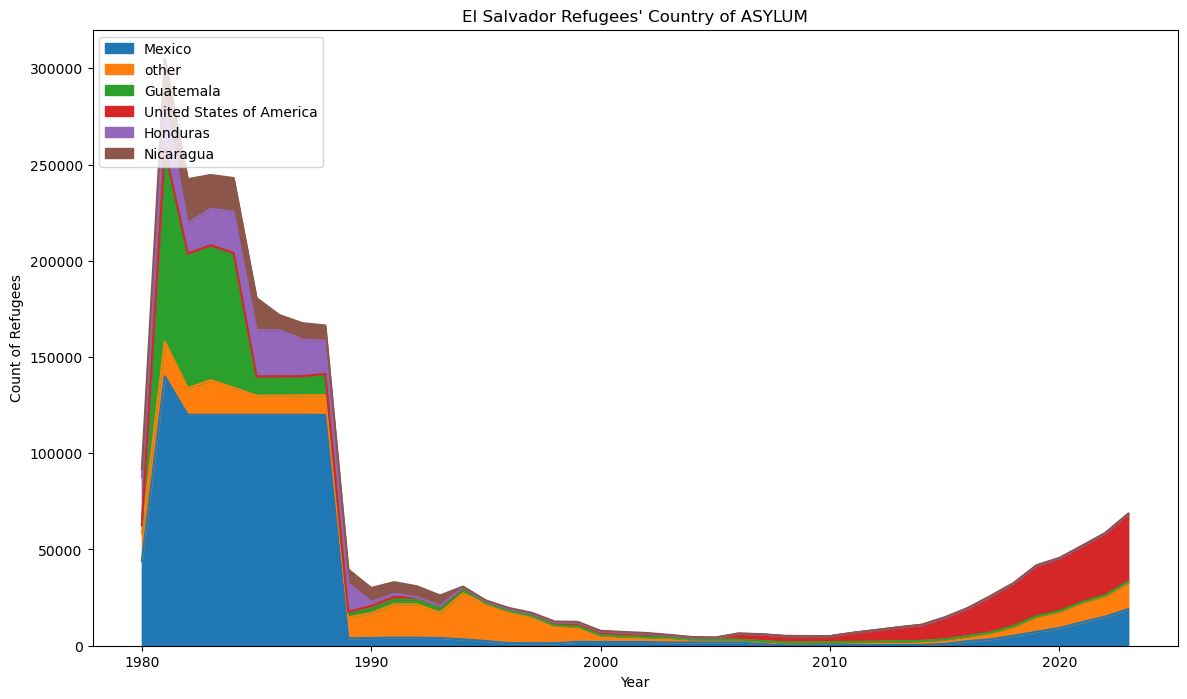

In [143]:
# graph 
plt.figure(figsize=(14, 8))
salvador_pivot_sorted.plot(kind='area', stacked=True, ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('El Salvador Refugees\' Country of ASYLUM')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [40]:
# SYRIAN ARAB REPUBLIC

In [41]:
# pulling out only data where country of origin was SYRIAN ARAB REPUBLIC
syria = pop_df[pop_df['Country of origin'] == 'Syrian Arab Rep.']

In [42]:
# which countries do I want to highlight? 
syria \
    .groupby(['Country of asylum'])['Refugees under UNHCR\'s mandate'].sum() \
    .reset_index() \
    .sort_values('Refugees under UNHCR\'s mandate', ascending=False) \
    .head()

,Country of asylum,Refugees under UNHCR's mandate
126,Türkiye,32472050
68,Lebanon,10354118
62,Jordan,7354780
47,Germany,4736891
56,Iraq,2764752


In [43]:
# grouping by year, country of asylum 
syria_grouped = syria.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
syria_grouped.head(4)

,Year,Country of asylum,Refugees under UNHCR's mandate
0,1968,Lebanon,1200
1,1969,Lebanon,1200
2,1979,Lebanon,500
3,1980,Lebanon,500


In [44]:
# mrk all countries other than highlighted countries as 'other'
country_of_asylum = []
for country in syria_grouped['Country of asylum']:
    if country == 'Türkiye':
        country_of_asylum.append('Türkiye')
    elif country == 'Lebanon':
        country_of_asylum.append('Lebanon')
    elif country == 'Jordan':
        country_of_asylum.append('Jordan')
    elif country == 'Germany':
        country_of_asylum.append('Germany')
    else:
        country_of_asylum.append('other')
syria_grouped['country_of_asylum'] = country_of_asylum
syria_grouped

,Year,Country of asylum,Refugees under UNHCR's mandate,country_of_asylum
0,1968,Lebanon,1200,Lebanon
1,1969,Lebanon,1200,Lebanon
2,1979,Lebanon,500,Lebanon
3,1980,Lebanon,500,Lebanon
4,1981,Italy,5,other
...,...,...,...,...
2119,2023,United States of America,8627,other
2120,2023,Uruguay,66,other
2121,2023,Venezuela (Bolivarian Republic of),33,other
2122,2023,Yemen,2482,other


In [45]:
# group again by year / country with new column country_of_asylum
syria_grouped_2 = syria_grouped.groupby(['Year', 'country_of_asylum']).agg({
    'Refugees under UNHCR\'s mandate': 'sum'  # Sum or choose another aggregation method
}).reset_index()
syria_grouped_2

,Year,country_of_asylum,Refugees under UNHCR's mandate
0,1968,Lebanon,1200
1,1969,Lebanon,1200
2,1979,Lebanon,500
3,1980,Lebanon,500
4,1981,Lebanon,500
5,1981,other,5
6,1982,Lebanon,500
7,1982,other,5
8,1983,Lebanon,520
9,1983,other,6


In [46]:
# now I can pivot 
syria_pivot = syria_grouped_2.pivot(index='Year', columns='country_of_asylum', values='Refugees under UNHCR\'s mandate')
syria_pivot.head()

country_of_asylum,Germany,Jordan,Lebanon,Türkiye,other
Year,,,,,
1968,NaN,NaN,1200.0,NaN,NaN
1969,NaN,NaN,1200.0,NaN,NaN
1979,NaN,NaN,500.0,NaN,NaN
1980,NaN,NaN,500.0,NaN,NaN
1981,NaN,NaN,500.0,NaN,5.0


In [145]:
#chat gpt... to try to sort by volumn 
total_refugees_by_country_syria = syria_pivot.sum(axis=0)

# Step 2: Sort the columns of the DataFrame by the total refugee count (from most to least)
syria_pivot_sorted = syria_pivot[total_refugees_by_country_syria.sort_values(ascending=False).index]

In [5]:
#syria_pivot_sorted

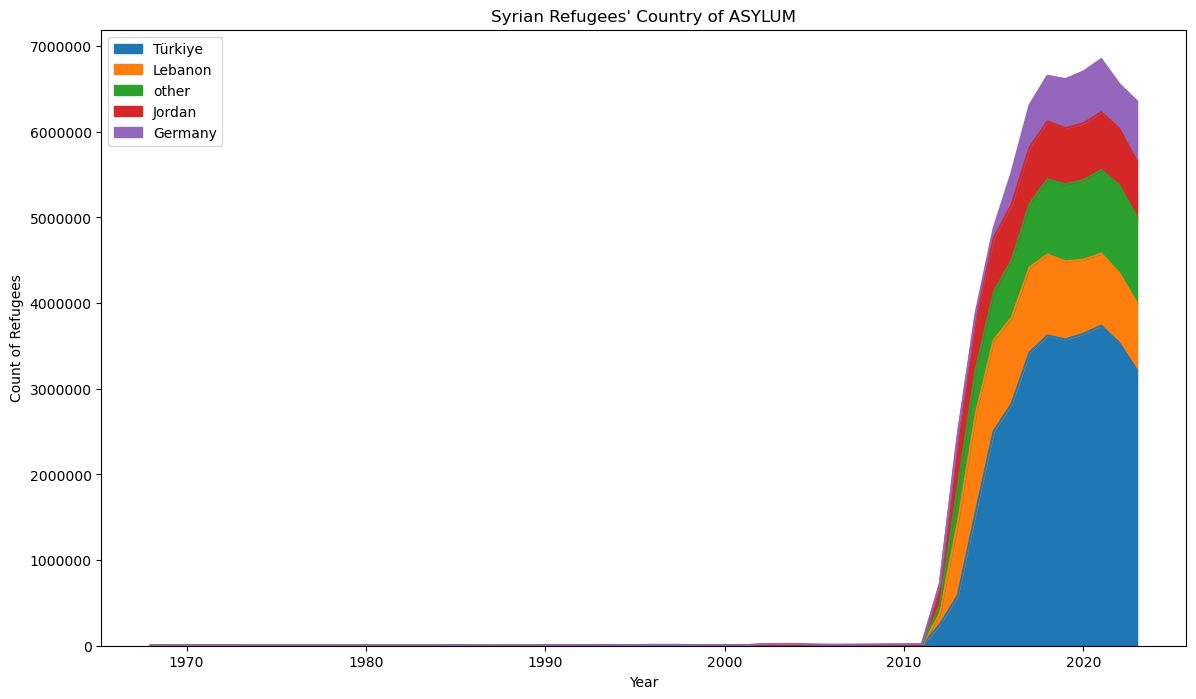

In [147]:
plt.figure(figsize=(14, 8))
syria_pivot_sorted.plot(kind='area', stacked=True, ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Syrian Refugees\' Country of ASYLUM')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [48]:
# pulling out only data where country of origin was UKRAINE 
ukraine = pop_df[pop_df['Country of origin'] == 'Ukraine']

In [129]:
# which countries do I want to highlight? 
ukraine \
    .groupby(['Country of asylum'])['Refugees under UNHCR\'s mandate'].sum() \
    .reset_index() \
    .sort_values('Refugees under UNHCR\'s mandate', ascending=False) \
    .head()

,Country of asylum,Refugees under UNHCR's mandate
70,Russian Federation,3545257
29,Germany,2466515
65,Poland,1916565
19,Czechia,811572
82,United Kingdom of Great Britain and Northern I...,414106


In [131]:
# grouping by year, country of asylum 
ukraine_grouped = ukraine.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
ukraine_grouped.head(4)

,Year,Country of asylum,Refugees under UNHCR's mandate
0,1992,Denmark,5
1,1992,Netherlands (Kingdom of the),13
2,1992,Sweden,14
3,1992,United States of America,7


In [133]:
# mark all countries other than highlighted countries as 'other'
country_of_asylum = []
for country in ukraine_grouped['Country of asylum']:
    if country == 'Russian Federation':
        country_of_asylum.append('Russian Federation')
    elif country == 'Germany':
        country_of_asylum.append('Germany')
    elif country == 'Poland':
        country_of_asylum.append('Poland')
    elif country == 'Czechia':
        country_of_asylum.append('Czechia')
    else:
        country_of_asylum.append('other')
ukraine_grouped['country_of_asylum'] = country_of_asylum
ukraine_grouped

,Year,Country of asylum,Refugees under UNHCR's mandate,country_of_asylum
0,1992,Denmark,5,other
1,1992,Netherlands (Kingdom of the),13,other
2,1992,Sweden,14,other
3,1992,United States of America,7,other
4,1993,Denmark,5,other
...,...,...,...,...
1127,2023,Türkiye,3232,other
1128,2023,Ukraine,0,other
1129,2023,United Kingdom of Great Britain and Northern I...,225497,other
1130,2023,United States of America,3299,other


In [1]:
# group again by year / country with new column country_of_asylum
ukraine_grouped_2 = ukraine_grouped.groupby(['Year', 'country_of_asylum']).agg({
    'Refugees under UNHCR\'s mandate': 'sum'  # Sum or choose another aggregation method
}).reset_index()
#ukraine_grouped_2

NameError: name 'ukraine_grouped' is not defined

In [137]:
ukraine_pivot = ukraine_grouped_2.pivot(index='Year', columns='country_of_asylum', values='Refugees under UNHCR\'s mandate')
ukraine_pivot.head()

country_of_asylum,Czechia,Germany,Poland,Russian Federation,other
Year,,,,,
1992,NaN,NaN,NaN,NaN,39.0
1993,NaN,NaN,NaN,NaN,133.0
1994,NaN,NaN,NaN,NaN,917.0
1995,NaN,NaN,NaN,NaN,1702.0
1996,49.0,NaN,NaN,2297.0,3760.0


In [3]:
#ukraine_pivot

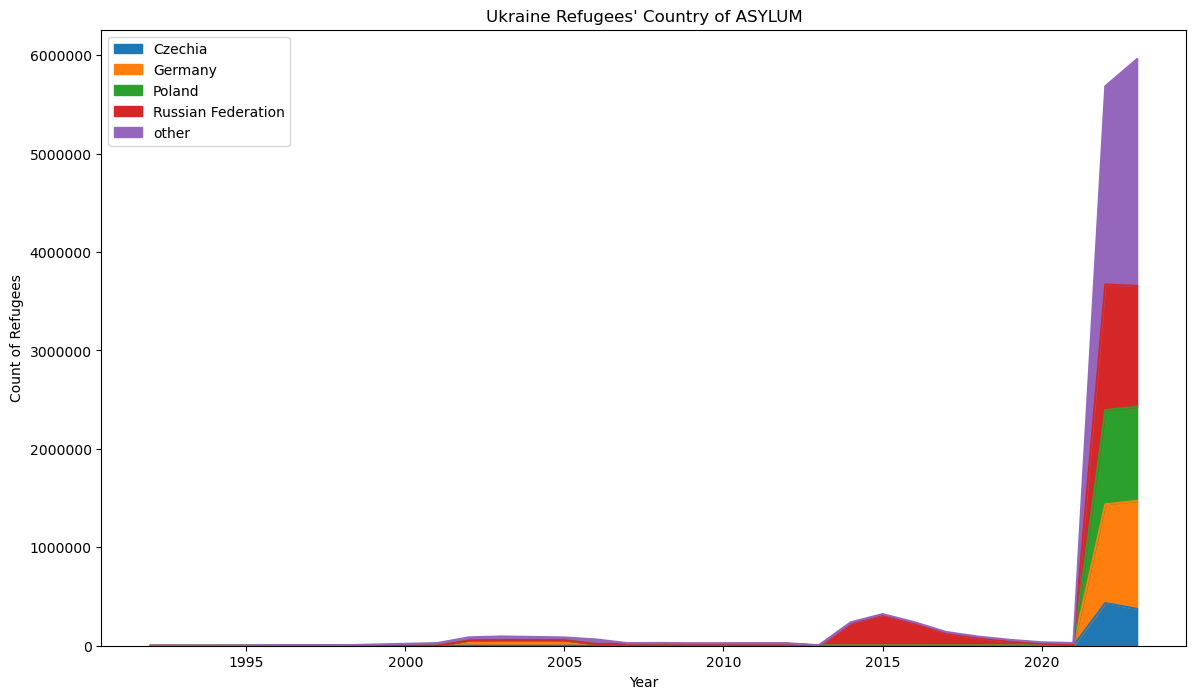

In [139]:
plt.figure(figsize=(14, 8))
ukraine_pivot.plot(kind='area', stacked=True, ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Ukraine Refugees\' Country of ASYLUM')
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [9]:
# FRIENDLINESS INDEX

In [13]:
pop_df.head()

NameError: name 'pop_df' is not defined

In [55]:
# find countries with the highest number of refugees in a single year
(
    pop_df.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum()
    .reset_index()
    .sort_values('Refugees under UNHCR\'s mandate', ascending=False)
    .head(20)
)

,Year,Country of origin,Refugees under UNHCR's mandate
6802,2021,Syrian Arab Rep.,6848865
6599,2020,Syrian Arab Rep.,6702910
6197,2018,Syrian Arab Rep.,6654374
6397,2019,Syrian Arab Rep.,6615249
7007,2022,Syrian Arab Rep.,6559736
7035,2023,Afghanistan,6403144
7211,2023,Syrian Arab Rep.,6355788
1159,1990,Afghanistan,6339095
6000,2017,Syrian Arab Rep.,6310498
1254,1991,Afghanistan,6306301


In [56]:
# installed this on 10/1/24 and it said "Successfully installed pysankey-0.0.1" 
# pip install pysankey

In [57]:
# imported sankey on 10/1/24
# from pySankey.sankey import sankey

In [58]:
# this isn't correct. Need just two columns. Not two tables..
#sankey(pop_df['Country of origin'], pop_df['Country of asylum'], aspect=20, fontsize=12)

In [59]:
# chat gpt
# Step 1: Filter relevant columns
df_filtered = pop_df[['Country of origin', 'Country of asylum', 'Refugees under UNHCR\'s mandate']]

# Step 2: Group the data to sum 'Refugees under UNHCR\'s mandate' for each pair of 'Country of origin' and 'Country of asylum'
df_grouped_asylum = df_filtered.groupby(['Country of origin', 'Country of asylum']).agg({'Refugees under UNHCR\'s mandate': 'sum'}).reset_index()
#df_grouped.head(20)


In [60]:
# THIS CODE WORKS! But it's wayyyyyyy to many countries to be legible 
'''
sankey(
    left=df_grouped['Country of origin'],       # Left side: Country of origin
    right=df_grouped['Country of asylum'],      # Right side: Country of asylum
    leftWeight=df_grouped['Refugees under UNHCR\'s mandate'],  # Flow magnitude between the two (based on refugees)
    rightWeight=df_grouped['Refugees under UNHCR\'s mandate'] # Same as left weight to keep balance
)

plt.show()
'''

"\nsankey(\n    left=df_grouped['Country of origin'],       # Left side: Country of origin\n    right=df_grouped['Country of asylum'],      # Right side: Country of asylum\n    leftWeight=df_grouped['Refugees under UNHCR's mandate'],  # Flow magnitude between the two (based on refugees)\n    rightWeight=df_grouped['Refugees under UNHCR's mandate'] # Same as left weight to keep balance\n)\n\nplt.show()\n"